In [1]:
import os
import pandas as pd
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.transform import resize

In [2]:
import numpy as np
import pandas as pd
import random as ran
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from keras import  models, layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

In [3]:
image_dir = os.path.dirname(os.getcwd())+"\\Screenshots\\InContext\\"
filenames = os.listdir(image_dir)
labels = [x.split("_")[0] for x in filenames]
img = [imread(image_dir + x) for x in filenames]

data = pd.DataFrame({"filename": filenames, "label": labels, "img": img})

for index, row in data.iterrows():
    img = imread(image_dir + row["filename"])
    img = resize(img, (80,80))
    data.loc[index, "img"] = img

data = data.reset_index()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     720 non-null    int64 
 1   filename  720 non-null    object
 2   label     720 non-null    object
 3   img       720 non-null    object
dtypes: int64(1), object(3)
memory usage: 22.6+ KB


In [4]:
#Splitting the data into training and testing
train_df, test_df = train_test_split(data, test_size=0.3)

# Datagen for training data. Augment the data by rotating, shifting, flipping, to make the model more robust and less prone to overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_dataframe(dataframe = train_df,
    directory=image_dir,
    target_size=(64, 64),
    x_col='filename',
    y_col='label',
    batch_size=32,
    class_mode='categorical'  # or 'categorical' based on your problem
)



Found 504 validated image filenames belonging to 5 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(64, 64),
    batch_size=32,
    class_mode= "categorical"  # or 'categorical'
)

Found 216 validated image filenames belonging to 5 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),  # Adjust input_shape based on your image dimensions
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    # Add more layers as needed
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')  # or more units with 'softmax' for multi-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
trained_model_initial = model.fit(train_generator,validation_data = test_generator, epochs=30)

C:\Users\Merved\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


C:\Users\Merved\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.3114 - loss: 1.7985 - val_accuracy: 0.6852 - val_loss: 0.7966
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.6674 - loss: 0.8486 - val_accuracy: 0.8935 - val_loss: 0.3225
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.8627 - loss: 0.4343 - val_accuracy: 0.9676 - val_loss: 0.1534
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.8953 - loss: 0.3041 - val_accuracy: 0.9167 - val_loss: 0.1550
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.9196 - loss: 0.2143 - val_accuracy: 0.8981 - val_loss: 0.2185
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.9326 - loss: 0.1749 - val_accuracy: 0.8935 - val_loss: 0.2649
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9494 - loss: 0.1608 - val_accuracy: 0.9028 - val_loss: 0.3866
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.9066 - loss: 0.2052 - val_accuracy: 0.9259 - val_

In [13]:
def plot_model_loss(model):
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

plot_model_loss(trained_model_initial)

NameError: name 'trained_model_initial' is not defined

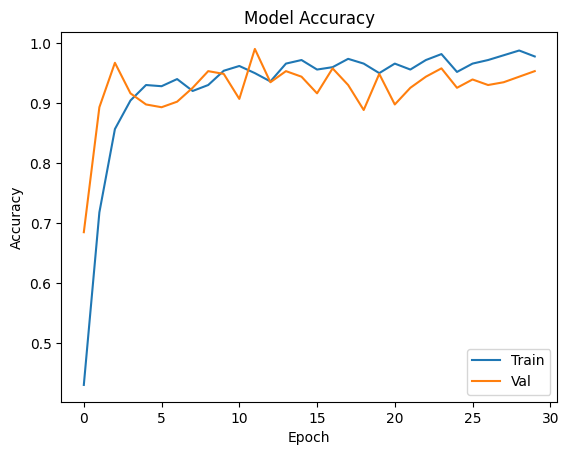

In [8]:
def plot_model_acc(model):
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.show()

plot_model_acc(trained_model_initial)

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),  # Adjust input_shape based on your image dimensions
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    # Add more layers as needed
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')  # or more units with 'softmax' for multi-class classification
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
trained_model_reduced_lr = model.fit(train_generator,validation_data = test_generator, epochs=30)

C:\Users\Merved\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.2037 - loss: 1.6444 - val_accuracy: 0.4352 - val_loss: 1.4337
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.4112 - loss: 1.4232 - val_accuracy: 0.7685 - val_loss: 1.1646
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.6124 - loss: 1.2067 - val_accuracy: 0.7731 - val_loss: 0.9439
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.6040 - loss: 1.0645 - val_accuracy: 0.7917 - val_loss: 0.7602
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.7032 - loss: 0.9107 - val_accuracy: 0.7963 - val_loss: 0.6183
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.6818 - loss: 0.8553 - val_accuracy: 0.8241 - val_loss: 0.5950
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.7234 - loss: 0.7154 - val_accuracy: 0.8009 - val_loss: 0.6340
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.7847 - loss: 0.6436 - val_accuracy: 0.

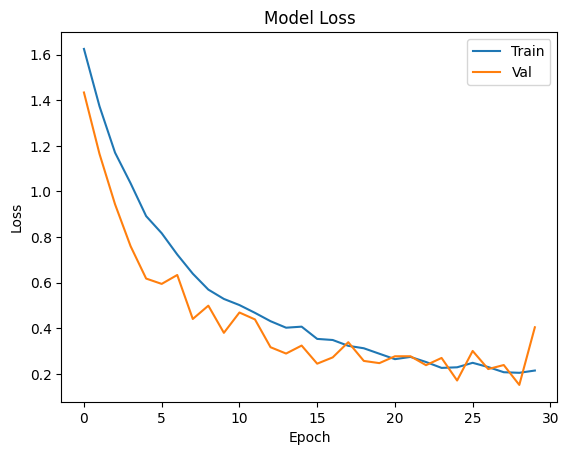

In [10]:
plot_model_loss(trained_model_reduced_lr)

In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),  # Adjust input_shape based on your image dimensions
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    # Add more layers as needed
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')  # or more units with 'softmax' for multi-class classification
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
trained_model_inc_epochs = model.fit(train_generator,validation_data = test_generator, epochs=60)

Epoch 1/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.2687 - loss: 1.5900 - val_accuracy: 0.4722 - val_loss: 1.3738
Epoch 2/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.4372 - loss: 1.4170 - val_accuracy: 0.5972 - val_loss: 1.1360
Epoch 3/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.5921 - loss: 1.1696 - val_accuracy: 0.8194 - val_loss: 0.8432
Epoch 4/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.6403 - loss: 1.0204 - val_accuracy: 0.7778 - val_loss: 0.7412
Epoch 5/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.7096 - loss: 0.8715 - val_accuracy: 0.7870 - val_loss: 0.6843
Epoch 6/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.7497 - loss: 0.7762 - val_accuracy: 0.8194 - val_loss: 0.6077
Epoch 7/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.7777 - loss: 0.6270 - val_accuracy: 0.8657 - val_loss: 0.4769
Epoch 8/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.8382 - loss: 0.5655 - val_accuracy: 0.

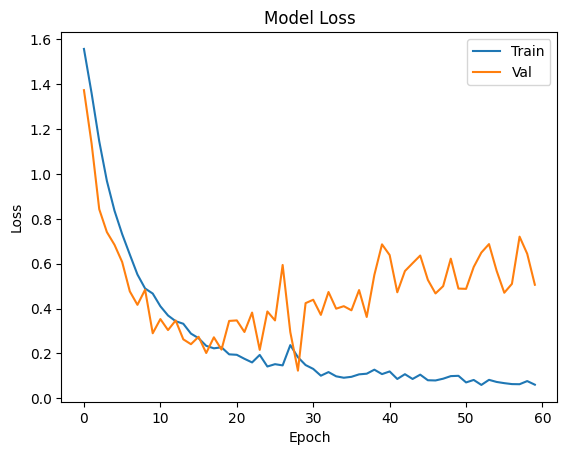

In [15]:
plot_model_loss(trained_model_inc_epochs)

In [16]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),  # Adjust input_shape based on your image dimensions
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    # Add more layers as needed
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # or more units with 'softmax' for multi-class classification
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
trained_model_simplified = model.fit(train_generator,validation_data = test_generator, epochs=60)

C:\Users\Merved\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.2135 - loss: 1.6049 - val_accuracy: 0.2593 - val_loss: 1.5573
Epoch 2/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.3791 - loss: 1.5568 - val_accuracy: 0.4213 - val_loss: 1.4609
Epoch 3/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.3386 - loss: 1.5008 - val_accuracy: 0.5324 - val_loss: 1.3552
Epoch 4/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.4484 - loss: 1.3962 - val_accuracy: 0.6852 - val_loss: 1.2062
Epoch 5/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.5228 - loss: 1.3190 - val_accuracy: 0.5787 - val_loss: 1.0945
Epoch 6/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.6009 - loss: 1.2106 - val_accuracy: 0.6250 - val_loss: 1.0140
Epoch 7/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.6251 - loss: 1.0767 - val_accuracy: 0.7315 - val_loss: 0.9185
Epoch 8/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.6565 - loss: 1.0467 - val_accuracy: 0.7963 - 

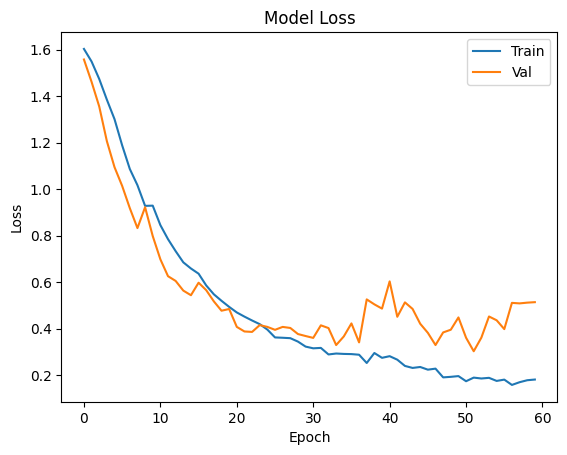

In [17]:
plot_model_loss(trained_model_simplified)

In [18]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),  # Adjust input_shape based on your image dimensions
    MaxPooling2D(2, 2),
    # Add more layers as needed
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')  # or more units with 'softmax' for multi-class classification
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
trained_model_remove_layer = model.fit(train_generator,validation_data = test_generator, epochs=60)

C:\Users\Merved\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.2305 - loss: 1.7068 - val_accuracy: 0.3102 - val_loss: 1.4035
Epoch 2/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.3946 - loss: 1.4080 - val_accuracy: 0.4630 - val_loss: 1.1547
Epoch 3/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.5802 - loss: 1.2023 - val_accuracy: 0.6713 - val_loss: 0.9688
Epoch 4/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.6151 - loss: 1.0505 - val_accuracy: 0.7315 - val_loss: 0.8028
Epoch 5/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.7066 - loss: 0.9373 - val_accuracy: 0.8380 - val_loss: 0.6879
Epoch 6/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.7230 - loss: 0.8213 - val_accuracy: 0.7546 - val_loss: 0.6589
Epoch 7/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.7753 - loss: 0.7439 - val_accuracy: 0.8148 - val_loss: 0.5710
Epoch 8/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.7877 - loss: 0.7284 - val_accuracy: 0.

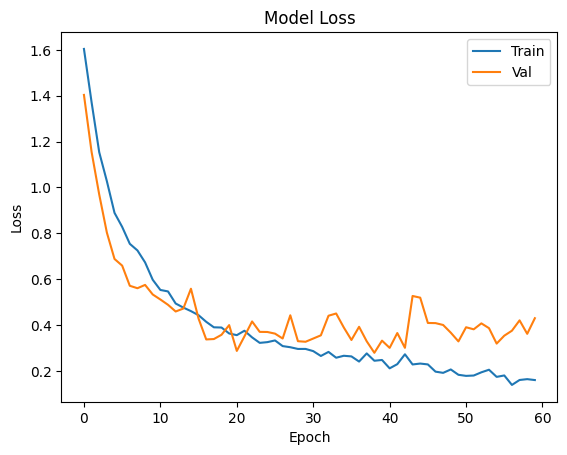

In [19]:
plot_model_loss(trained_model_remove_layer)

In [26]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),  # Adjust input_shape based on your image dimensions
    MaxPooling2D(2, 2),
    # Add more layers as needed
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')  # or more units with 'softmax' for multi-class classification
])

model.compile(optimizer=Adam(learning_rate=0.0002), loss='categorical_crossentropy', metrics=['accuracy'])
trained_model_inc_lr = model.fit(train_generator,validation_data = test_generator, epochs=60)

Epoch 1/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.2302 - loss: 1.9290 - val_accuracy: 0.2778 - val_loss: 1.4346
Epoch 2/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.3586 - loss: 1.4076 - val_accuracy: 0.4537 - val_loss: 1.1804
Epoch 3/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.5161 - loss: 1.1943 - val_accuracy: 0.6435 - val_loss: 0.9294
Epoch 4/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.5780 - loss: 1.0704 - val_accuracy: 0.7361 - val_loss: 0.7963
Epoch 5/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.6475 - loss: 0.9660 - val_accuracy: 0.6944 - val_loss: 0.7283
Epoch 6/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.6076 - loss: 0.9642 - val_accuracy: 0.5972 - val_loss: 0.8302
Epoch 7/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.6950 - loss: 0.8399 - val_accuracy: 0.7685 - val_loss: 0.6296
Epoch 8/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.7569 - loss: 0.7427 - val_accuracy: 0.

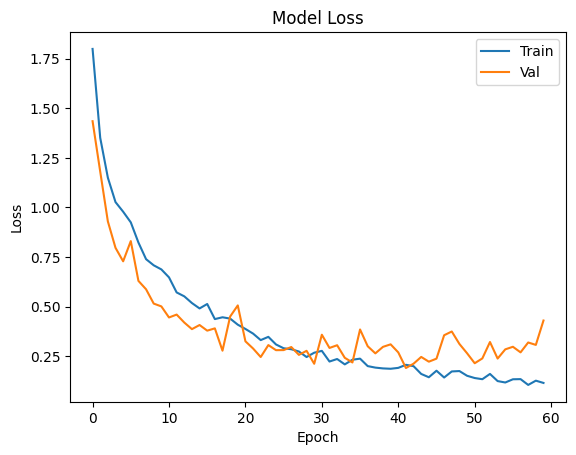

In [27]:
plot_model_loss(trained_model_inc_lr)